# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [1]:
import re
import nltk
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
%matplotlib inline

In [2]:
data = pd.read_csv('Amazon_Unlocked_Mobile.csv')
print(f'Number of Observations is {data.shape[0]}')
print('We will work with 2% of the data in order to', end='')
print('make things easier for hierarchical clustering')
data = data.sample(frac=0.02, random_state=1)
data.reset_index(drop=True, inplace=True)
print('Number of Observations in the resampled data in {}'.format(
                                                    data.shape[0]))
data.head()

Number of Observations is 413840
We will work with 2% of the data in order tomake things easier for hierarchical clustering
Number of Observations in the resampled data in 8277


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0
1,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0
2,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0
3,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0
4,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,NaN,529.99,5,no complaints. worked fine and still working p...,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 6 columns):
Product Name    8277 non-null object
Brand Name      6958 non-null object
Price           8158 non-null float64
Rating          8277 non-null int64
Reviews         8276 non-null object
Review Votes    8038 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 388.1+ KB


In [4]:
t = []
for column in data.columns:
    name = ''
    for letter in column:
        if letter == ' ':
            name += '_'
        name += letter.lower()
    t.append(name)    

data.columns = t
data.head()

,product_ name,brand_ name,price,rating,reviews,review_ votes
0,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0
1,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0
2,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0
3,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0
4,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,NaN,529.99,5,no complaints. worked fine and still working p...,0.0


In [5]:
data[data.reviews.isnull()]

,product_ name,brand_ name,price,rating,reviews,review_ votes
4053,Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera -...,NaN,103.94,4,NaN,3.0


In [6]:
data = data[data['reviews'].isnull()==False]

In [7]:
def review_to_wordlist( review, remove_stopwords=True):
    
    review_text = re.sub("[^a-zA-Z]"," ", review)
    words = review_text.lower().split()    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))
    return(b)

In [8]:
clean_data_reviews = []
for review in data['reviews']:
    clean_data_reviews.append( " ".join(review_to_wordlist(review)))

In [9]:
data['reviews_clean'] = clean_data_reviews
data.head()

,product_ name,brand_ name,price,rating,reviews,review_ votes,reviews_clean
0,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,year realli complain gave teenag replac wait u...
1,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,perfect thank
2,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,back camera stop work phone touch screen stop ...
3,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,good
4,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,NaN,529.99,5,no complaints. worked fine and still working p...,0.0,complaint work fine still work perfect tear we...


# K-Means

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(clean_data_reviews)
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")
Y = vectorizer.transform(["the phone is great."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["the phone is not working."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 excel
 excelent
 product
 phone
 thank
 recommend
 producto
 good
 price
 seller
Cluster 1:
 work
 perfect
 phone
 fine
 great
 condit
 good
 product
 time
 new
Cluster 2:
 great
 phone
 work
 price
 product
 buy
 condit
 thank
 fast
 good
Cluster 3:
 good
 phone
 product
 price
 thank
 qualiti
 far
 work
 condit
 cell
Cluster 4:
 phone
 use
 good
 like
 great
 nice
 work
 screen
 batteri
 time
Cluster 5:
 love
 phone
 great
 daughter
 new
 good
 gift
 work
 thank
 bought


Prediction
[2]
[4]


# DBSCAN

In [11]:
from sklearn.cluster import DBSCAN
db1 = DBSCAN(eps=0.9, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db1.labels_, dtype=bool)
core_samples_mask[db1.core_sample_indices_] = True
labels1 = db1.labels_
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0) # Number of clusters in labels
print(labels1)
print()

clusters1 = {}
for c, i in enumerate(labels1):
    if i == -1:
        continue
    elif i in clusters1:
        clusters1[i].append( clean_data_reviews[c] )
    else:
        clusters1[i] = [clean_data_reviews[c]]
for c in clusters1:
    print(clusters1[c])
    print()

[-1  0  0 ...  0 -1 -1]

['perfect thank', 'back camera stop work phone touch screen stop work restart phone get work phone huge disappoint worth paid', 'good', 'perfect', 'good', 'excel', 'nice phone money', 'speaker issu', 'everyth ok', 'cool phone', 'item deliv time excel', 'good phone', 'speaker work', 'good', 'excel', 'great buy', 'like', 'great work like new', 'nice phone', 'great phone still work perfect would recommend', 'good', 'fast ship product arriv describ happi', 'excel phone', 'work expect', 'good product', 'provid full g lte mobil network permit voic call g lte function mobil seller made clear list', 'realli like easi set', 'brought item daughter happi im happi', 'bought friend work great', 'excel product', 'great love', 'reason price fast deliveri', 'still work fine', 'like new still item plastic', 'ok', 'love', 'good packag great product last littl arriv perfect condit', 'good phone', 'better expect', 'yes figur', 'good phone problem', 'wonder', 'excel', 'good', 'love

# Hierarchical Clustering

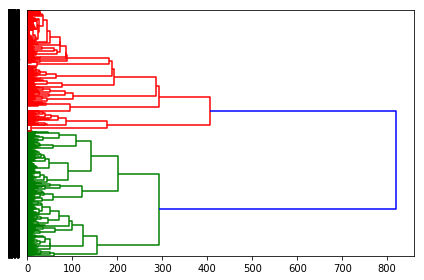

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(stop_words='english') 
dtm2 = vectorizer.fit_transform(clean_data_reviews) 
vocab2 = vectorizer.get_feature_names()
dtm2 = dtm2.toarray()

# Plot dendrogram 
cos_dist2 = 1 - cosine_similarity(dtm2)
linkage_matrix2 = ward(cos_dist2)
dendrogram(linkage_matrix2, color_threshold=0.6*max(linkage_matrix2[:,2]), orientation="right")
plt.tight_layout()
plt.show()

# In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

Conlusion

As seen above the clustering models, they presented different results. Surely, they do have some advantages and disadvatages, howvver, the K means is the most flexible one as it is easy to interpret. DBSCAN may not be realay effective, as seen above, it is not able to inclunce the noise and handle with large dataset. Hierarchial clustering has also same disadvatages with DBSCAN. At this point, it is more suitable to use K-means by applying some methods to select K optimal values. 